## 多重共線性
ある説明変数Aと別の説明変数Bの相関が高いとき、多重共線性があるといいます

## 次元削減
- 次元削減とは、元のデータセット中の特徴をより少なく効果的な特徴に置き換えることです。 
- 次元削減をすると、情報量が減るのでトレーニングデータの平均二乗誤差は増えていきます。テストデータの平均二乗誤差も増えていきますが、過学習が抑えられるので、増え方は緩やかになります。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
X, y = load_boston(True)  # ボストン市の住宅価格データ一式

In [2]:
# 全説明変数の時の結果
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=len(y)//2, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
score1 = mean_squared_error(y_train, lr.predict(X_train))
score2 = mean_squared_error(y_test, lr.predict(X_test))
score1, score2

(19.628348663079148, 25.309383412712048)

In [3]:
# 次元削減の効果
res1, res2 = [], []
nums = [13, 11, 9, 7, 5, 3]
for num in nums:
    # 次元削減
    # PCA(新しい次元数).fit_transform(元のデータ)
    X_pca = PCA(num).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=len(y)//2, random_state=0)
    lr = LinearRegression().fit(X_train, y_train)
    res1.append(mean_squared_error(y_train, lr.predict(X_train)))
    res2.append(mean_squared_error(y_test, lr.predict(X_test)))

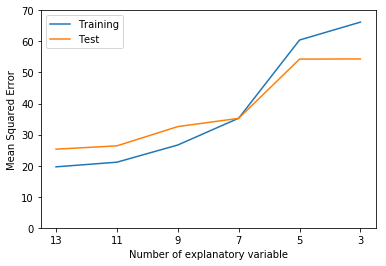

In [4]:
# グラフで比較
plt.xlabel('Number of explanatory variable')
plt.ylabel('Mean Squared Error')
plt.ylim((0, 70))
plt.xticks(range(len(nums)), nums)
plt.plot(res1, label='Training')
plt.plot(res2, label='Test')
plt.legend();

## 正則化
- 正則化とは、過学習などを防ぐために学習モデルにペナルティになる計算を入れることです。
- パラメーターを推定するときに、誤差だけではなくパラメーター自体の大きさも小さくしようとします。この追加する項を正則化項（ペナルティー）といい、正則化項にかかる係数を正則化パラメーター（α）といいます。αが0だと正則化の効果はありません。なお、Ridgeなどのモデルでは、αはalphaオプションに対応します。
- L2ペナルティー：パラメーターの二乗の和。Ridge（リッジ）回帰で使われます。
- L1ペナルティー：パラメーターの絶対値の和。Lasso（ラッソ）で使われます。
- L1とL2ペナルティー：L1ペナルティーとL2ペナルティーの重み和。Elastic Net（エラスティックネット）で使われます。

In [1]:
%matplotlib inline
import pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
X, y = load_boston(True)  # ボストン市の住宅価格データ

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
# 線形回帰
lr = LinearRegression()
lr.fit(X_train, y_train)
# Ridge回帰
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [4]:
# 線形回帰の予測
y_pred1 = lr.predict(X_test)
# 線形回帰の評価
score1 = r2_score(y_test, y_pred1)
# Ridge回帰の予測
y_pred2 = ridge.predict(X_test)
# Ridge回帰の評価
score2 = r2_score(y_test, y_pred2)
score1, score2

(0.6353620786674621, 0.6265116223767431)

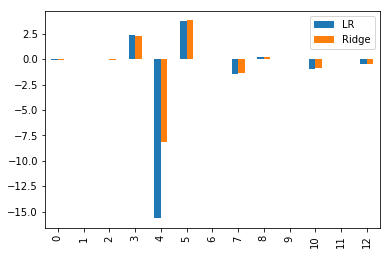

In [5]:
df = pd.DataFrame({'LR': lr.coef_, 'Ridge': ridge.coef_})
df.plot.bar()